In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [2]:
# Read CSV file
df1 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection1.csv")
df2 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection2.csv")
df3 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection3.csv")
df4 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection4.csv")
df5 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection5.csv")
df6 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection6.csv")
df7 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection7.csv")
df8 = pd.read_csv("/Users/sanzi/Desktop/Facial-Recognition-Music-Recommendation-System/emotion_detection8.csv")
emotion_csv = pd.concat([df1,df2,df3, df4, df5, df6, df7, df8])

In [3]:
emotion_csv


,face,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,...,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,frame,face_id,timestamp,success,Emotion Detected
0,0.0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,...,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
1,0.0,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,...,0.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,Anger
2,0.0,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,...,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Anger
3,0.0,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,Anger
4,0.0,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,...,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,Anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1243.0,0.0,0.0,0.0,Sad
4250,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1244.0,0.0,0.0,0.0,Sad
4251,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1245.0,0.0,0.0,0.0,Sad
4252,NaN,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.0,1246.0,0.0,0.0,0.0,Sad


In [ ]:
# list of columns
list(emotion_csv.columns)

## Class Imbalance

In [17]:
# Count the occurance of each emotion to see if bias can occur
emotion_csv["Emotion Detected"].value_counts()

Happy       24538
Neutral     15290
Sad         14854
Anger       12903
Surprise    11166
Fear        10796
Disgust      1910
Contempt      239
Name: Emotion Detected, dtype: int64

In [4]:
# Plot the class imbalance
def plotimbalance(csvname, column):
    unique, counts = np.unique(csvname[column], return_counts=True)
    plt.bar(unique, counts)
    plt.xticks()
    plt.ylabel('Number of Samples')
    plt.xlabel('Emotion Detected')
    plt.show()

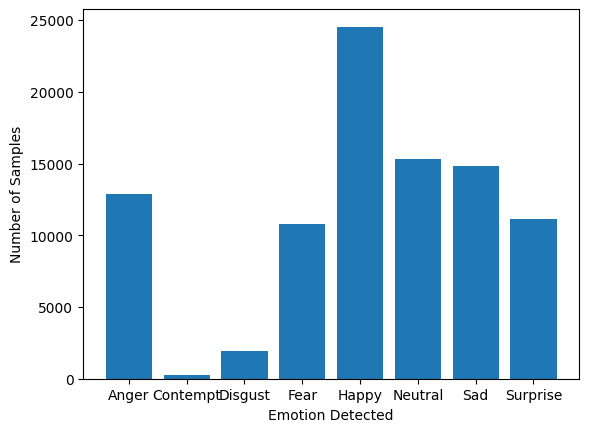

In [5]:
plotimbalance(emotion_csv, "Emotion Detected")

In [6]:
# Replace each emotion with a number value
emotion_csv = emotion_csv.replace(
            {"Happy": 1,
            "Neutral": 2,
            "Sad":3 ,
            "Anger": 4 ,
            "Surprise": 5 ,
            "Disgust":6 ,
            "Contempt": 7, 
            "Fear": 8})

# Remove unnesscary columns for csv with all emotions
emotion_csv = emotion_csv.drop(columns=["frame","face_id", "timestamp", "success", "face"])

emotion_csv

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,59.1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,40.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,67.1,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,63.4,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,60.4,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


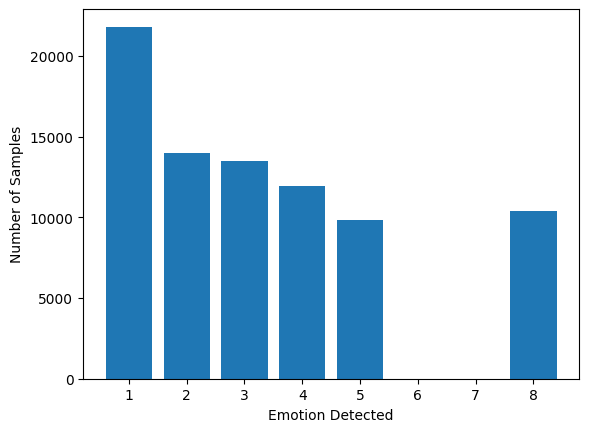

In [7]:
""" 
To deal with the class imbalance we are taking the following approaches:
- Remove the emotions contempt and disgust 
- Oversample the emotions: contempt and disgust
- Undersample the emotion: Happy
"""

# 1. Remove the emotions: Contempt and Disgust
emotion_csv_without_c_d = emotion_csv.drop(emotion_csv[emotion_csv['Emotion Detected'] == 7].index)
emotion_csv_without_c_d = emotion_csv_without_c_d.drop(emotion_csv_without_c_d[emotion_csv_without_c_d['Emotion Detected'] == 6].index)
emotion_csv_without_c_d["Emotion Detected"].value_counts()

# Plot the class imbalance after removing the emotions
plotimbalance(emotion_csv_without_c_d, "Emotion Detected")

In [22]:
# Find the mean sample size of emotion detected
mean_sample_size = round(emotion_csv["Emotion Detected"].value_counts().mean())
mean_sample_size

11462

In [8]:
# Class Labels 
emotion_class = emotion_csv["Emotion Detected"]
emotion_csv_without_c_d_class = emotion_csv_without_c_d["Emotion Detected"]

In [9]:
emotion_csv_without_c_d

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
239,0.975,0.154244,0.078627,-0.984899,-0.088668,0.071323,-0.993504,0.033,0.076,69.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
240,0.975,0.138883,0.103756,-0.984859,-0.226270,0.135969,-0.964528,-0.045,0.122,63.1,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
241,0.875,0.223451,0.093836,-0.970188,-0.134327,0.273706,-0.952387,0.046,0.189,50.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
242,0.025,-0.050798,-0.068885,-0.996330,-0.239529,-0.072698,-0.968164,-0.147,-0.072,107.7,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4
243,0.975,0.065336,0.115178,-0.991194,-0.228905,0.108176,-0.967420,-0.083,0.114,69.9,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [10]:
emotion_csv

,confidence,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.975,0.291979,0.089452,-0.952232,0.076873,0.111098,-0.990832,0.188,0.103,59.1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,0.625,0.082212,-0.064150,-0.994548,-0.119963,0.099111,-0.987819,-0.019,0.018,40.8,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.925,-0.107190,0.080964,-0.990936,-0.202938,0.010448,-0.979136,-0.156,0.046,67.1,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.875,0.159809,0.267341,-0.950258,-0.154324,0.255865,-0.954315,0.003,0.268,63.4,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.975,0.230670,0.125137,-0.964952,-0.147993,0.120513,-0.981619,0.042,0.126,60.4,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [11]:
# Columns with the Action Unit Presence for without and with contempt and disgust
emotion_csv_without_c_d_presence = emotion_csv_without_c_d[[
 'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'Emotion Detected']]

emotion_csv_presence = emotion_csv[[
 'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'Emotion Detected']]

In [12]:
emotion_csv_presence

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4
1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,4
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4
4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [13]:
emotion_csv_without_c_d_presence

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
239,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
240,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
242,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4
243,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [14]:
# Columns with the Action Unit Intensity for both csv files
emotion_csv_without_c_d_intensity = emotion_csv_without_c_d[['AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'Emotion Detected']]


emotion_csv_intensity = emotion_csv[
['AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU23_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'Emotion Detected']
]

In [15]:
emotion_csv_without_c_d_intensity

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
239,0.89,0.28,0.00,2.06,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.16,0.11,0.54,0.00,0.00,0.0,4
240,0.00,0.00,1.65,0.00,0.92,0.26,2.54,0.0,0.00,0.00,0.33,0.96,0.35,0.00,0.00,0.00,0.0,4
241,0.00,0.23,0.00,0.00,0.00,0.00,0.15,0.0,0.00,0.00,0.00,0.96,0.00,0.00,0.00,0.00,0.0,4
242,1.12,0.00,0.54,2.97,0.55,0.00,0.00,0.0,0.00,0.00,0.25,0.00,2.39,0.00,0.82,1.64,0.0,4
243,0.18,0.00,2.76,0.49,0.57,0.52,0.00,0.0,0.66,0.65,0.19,0.55,3.38,0.00,0.00,1.20,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3
4250,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3
4251,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3
4252,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3


In [16]:
emotion_csv_intensity

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
0,0.00,0.00,1.40,0.00,0.00,0.02,0.42,1.05,0.00,0.82,0.00,1.13,0.12,0.00,0.0,0.18,0.00,4
1,2.10,1.84,0.20,2.59,0.00,0.61,0.13,0.00,0.00,0.00,0.00,0.00,1.34,0.00,0.0,0.00,0.22,4
2,0.22,0.63,1.42,2.31,0.00,0.00,0.00,0.00,0.00,0.00,0.83,1.22,0.14,0.96,0.0,0.00,0.00,4
3,0.00,0.00,0.00,2.17,0.00,0.19,0.18,1.25,0.00,0.70,0.68,1.06,1.03,0.40,0.0,1.00,0.00,4
4,0.00,0.00,1.55,0.00,1.01,1.85,0.54,0.00,0.22,0.48,0.00,0.99,0.90,0.24,0.0,0.00,0.36,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3
4250,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3
4251,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3
4252,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,3


In [17]:
# CSV file made out of the 3d landmarks of face for both csv files
emotion_csv_without_c_d_3d_landmarks = emotion_csv_without_c_d[[
'X_0',
'X_1',
'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'X_16',
 'X_17',
 'X_18',
 'X_19',
 'X_20',
 'X_21',
 'X_22',
 'X_23',
 'X_24',
 'X_25',
 'X_26',
 'X_27',
 'X_28',
 'X_29',
 'X_30',
 'X_31',
 'X_32',
 'X_33',
 'X_34',
 'X_35',
 'X_36',
 'X_37',
 'X_38',
 'X_39',
 'X_40',
 'X_41',
 'X_42',
 'X_43',
 'X_44',
 'X_45',
 'X_46',
 'X_47',
 'X_48',
 'X_49',
 'X_50',
 'X_51',
 'X_52',
 'X_53',
 'X_54',
 'X_55',
 'X_56',
 'X_57',
 'X_58',
 'X_59',
 'X_60',
 'X_61',
 'X_62',
 'X_63',
 'X_64',
 'X_65',
 'X_66',
 'X_67',
 'Y_0',
 'Y_1',
 'Y_2',
 'Y_3',
 'Y_4',
 'Y_5',
 'Y_6',
 'Y_7',
 'Y_8',
 'Y_9',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14',
 'Y_15',
 'Y_16',
 'Y_17',
 'Y_18',
 'Y_19',
 'Y_20',
 'Y_21',
 'Y_22',
 'Y_23',
 'Y_24',
 'Y_25',
 'Y_26',
 'Y_27',
 'Y_28',
 'Y_29',
 'Y_30',
 'Y_31',
 'Y_32',
 'Y_33',
 'Y_34',
 'Y_35',
 'Y_36',
 'Y_37',
 'Y_38',
 'Y_39',
 'Y_40',
 'Y_41',
 'Y_42',
 'Y_43',
 'Y_44',
 'Y_45',
 'Y_46',
 'Y_47',
 'Y_48',
 'Y_49',
 'Y_50',
 'Y_51',
 'Y_52',
 'Y_53',
 'Y_54',
 'Y_55',
 'Y_56',
 'Y_57',
 'Y_58',
 'Y_59',
 'Y_60',
 'Y_61',
 'Y_62',
 'Y_63',
 'Y_64',
 'Y_65',
 'Y_66',
 'Y_67',
 'Z_0',
 'Z_1',
 'Z_2',
 'Z_3',
 'Z_4',
 'Z_5',
 'Z_6',
 'Z_7',
 'Z_8',
 'Z_9',
 'Z_10',
 'Z_11',
 'Z_12',
 'Z_13',
 'Z_14',
 'Z_15',
 'Z_16',
 'Z_17',
 'Z_18',
 'Z_19',
 'Z_20',
 'Z_21',
 'Z_22',
 'Z_23',
 'Z_24',
 'Z_25',
 'Z_26',
 'Z_27',
 'Z_28',
 'Z_29',
 'Z_30',
 'Z_31',
 'Z_32',
 'Z_33',
 'Z_34',
 'Z_35',
 'Z_36',
 'Z_37',
 'Z_38',
 'Z_39',
 'Z_40',
 'Z_41',
 'Z_42',
 'Z_43',
 'Z_44',
 'Z_45',
 'Z_46',
 'Z_47',
 'Z_48',
 'Z_49',
 'Z_50',
 'Z_51',
 'Z_52',
 'Z_53',
 'Z_54',
 'Z_55',
 'Z_56',
 'Z_57',
 'Z_58',
 'Z_59',
 'Z_60',
 'Z_61',
 'Z_62',
 'Z_63',
 'Z_64',
 'Z_65',
 'Z_66',
 'Z_67',
 'Emotion Detected']]

emotion_csv_3d_landmarks = emotion_csv[[
'X_0',
'X_1',
'X_2',
 'X_3',
 'X_4',
 'X_5',
 'X_6',
 'X_7',
 'X_8',
 'X_9',
 'X_10',
 'X_11',
 'X_12',
 'X_13',
 'X_14',
 'X_15',
 'X_16',
 'X_17',
 'X_18',
 'X_19',
 'X_20',
 'X_21',
 'X_22',
 'X_23',
 'X_24',
 'X_25',
 'X_26',
 'X_27',
 'X_28',
 'X_29',
 'X_30',
 'X_31',
 'X_32',
 'X_33',
 'X_34',
 'X_35',
 'X_36',
 'X_37',
 'X_38',
 'X_39',
 'X_40',
 'X_41',
 'X_42',
 'X_43',
 'X_44',
 'X_45',
 'X_46',
 'X_47',
 'X_48',
 'X_49',
 'X_50',
 'X_51',
 'X_52',
 'X_53',
 'X_54',
 'X_55',
 'X_56',
 'X_57',
 'X_58',
 'X_59',
 'X_60',
 'X_61',
 'X_62',
 'X_63',
 'X_64',
 'X_65',
 'X_66',
 'X_67',
 'Y_0',
 'Y_1',
 'Y_2',
 'Y_3',
 'Y_4',
 'Y_5',
 'Y_6',
 'Y_7',
 'Y_8',
 'Y_9',
 'Y_10',
 'Y_11',
 'Y_12',
 'Y_13',
 'Y_14',
 'Y_15',
 'Y_16',
 'Y_17',
 'Y_18',
 'Y_19',
 'Y_20',
 'Y_21',
 'Y_22',
 'Y_23',
 'Y_24',
 'Y_25',
 'Y_26',
 'Y_27',
 'Y_28',
 'Y_29',
 'Y_30',
 'Y_31',
 'Y_32',
 'Y_33',
 'Y_34',
 'Y_35',
 'Y_36',
 'Y_37',
 'Y_38',
 'Y_39',
 'Y_40',
 'Y_41',
 'Y_42',
 'Y_43',
 'Y_44',
 'Y_45',
 'Y_46',
 'Y_47',
 'Y_48',
 'Y_49',
 'Y_50',
 'Y_51',
 'Y_52',
 'Y_53',
 'Y_54',
 'Y_55',
 'Y_56',
 'Y_57',
 'Y_58',
 'Y_59',
 'Y_60',
 'Y_61',
 'Y_62',
 'Y_63',
 'Y_64',
 'Y_65',
 'Y_66',
 'Y_67',
 'Z_0',
 'Z_1',
 'Z_2',
 'Z_3',
 'Z_4',
 'Z_5',
 'Z_6',
 'Z_7',
 'Z_8',
 'Z_9',
 'Z_10',
 'Z_11',
 'Z_12',
 'Z_13',
 'Z_14',
 'Z_15',
 'Z_16',
 'Z_17',
 'Z_18',
 'Z_19',
 'Z_20',
 'Z_21',
 'Z_22',
 'Z_23',
 'Z_24',
 'Z_25',
 'Z_26',
 'Z_27',
 'Z_28',
 'Z_29',
 'Z_30',
 'Z_31',
 'Z_32',
 'Z_33',
 'Z_34',
 'Z_35',
 'Z_36',
 'Z_37',
 'Z_38',
 'Z_39',
 'Z_40',
 'Z_41',
 'Z_42',
 'Z_43',
 'Z_44',
 'Z_45',
 'Z_46',
 'Z_47',
 'Z_48',
 'Z_49',
 'Z_50',
 'Z_51',
 'Z_52',
 'Z_53',
 'Z_54',
 'Z_55',
 'Z_56',
 'Z_57',
 'Z_58',
 'Z_59',
 'Z_60',
 'Z_61',
 'Z_62',
 'Z_63',
 'Z_64',
 'Z_65',
 'Z_66',
 'Z_67',
 'Emotion Detected']]

In [18]:
# 2. Oversample the emotions: Contempt and disgust
def oversampling(x, y):
    # 2b. Set the sample size for each emotion class for oversampling
    #print(x_train["Emotion Detected"].value_counts())
    strategy = {4:10010 ,
                5:10009 ,
                6: 10011 ,
                7: 10007,
                8: 10008}

    # 2c. Apply the SMOTE for oversampling: Anger, Surprise, Disgust, Contempt, and Fear
    oversample = SMOTE(sampling_strategy=strategy)
    X, y = oversample.fit_resample(x, y)

    # 2d. Apply undersampling to Happy
    sampling_strategy = {1: 10012}
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
    x_over, y_over = rus.fit_resample(X, y)

    # 2g. Remove the Emotion Detected column in the X_res and replace the values 
    x_over.drop(columns="Emotion Detected")
    
    y_over = y_over.replace({
                1: "Happy",
                2: "Neutral",
                3: "Sad", 
                4: "Anger",
                5: "Surprise",
                6: "Disgust", 
                7: "Contempt",
                8: "Fear"})
     
    return x_over, y_over

In [19]:
# 3. Undersample the emotion: Happy with Contempt and Disgust removed
def unsample(x, y):
    
    # 3b. Undersample emotion: Happy in the training dataset
    sampling_strategy = {1: 9000}
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy)
    X_res, y_res = rus.fit_resample(x, y)
    
    # print(X_res["Emotion Detected"].value_counts()
    
    # Remove the Emotion Detected Column in the X_res
    X_res.drop(columns="Emotion Detected")
    
    return X_res, y_res

## Training and Testing Spilts

In [20]:
 # Split the new dataframe into training and testing sets for without emotions disgust and contempt
x_train_without_p, x_test_without_p, y_train_without_p, y_test_without_p = train_test_split(emotion_csv_without_c_d_presence, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

x_train_without_i, x_test_without_i, y_train_without_i, y_test_without_i = train_test_split(emotion_csv_without_c_d_intensity, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

x_train_without_l, x_test_without_l, y_train_without_l, y_test_without_l = train_test_split(emotion_csv_without_c_d_3d_landmarks, emotion_csv_without_c_d_class, test_size=0.33, random_state=42)

In [21]:
emotion_csv_without_c_d_presence

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Emotion Detected
239,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4
240,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
241,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
242,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4
243,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [22]:
 # Split the new dataframe into training and testing sets 
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(emotion_csv_presence, emotion_class, test_size=0.33, random_state=42)

x_train_i, x_test_i, y_train_i, y_test_i = train_test_split(emotion_csv_intensity, emotion_class, test_size=0.33, random_state=42)

x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(emotion_csv_3d_landmarks, emotion_class, test_size=0.33, random_state=42)

In [23]:
y_test_p

4475     1
7752     8
12934    1
11069    1
1714     2
        ..
6291     8
11798    1
19832    3
4562     1
3198     1
Name: Emotion Detected, Length: 30260, dtype: int64

In [24]:
# Replace Value
y_test_p = y_test_p.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})
y_test_p

4475       Happy
7752        Fear
12934      Happy
11069      Happy
1714     Neutral
          ...   
6291        Fear
11798      Happy
19832        Sad
4562       Happy
3198       Happy
Name: Emotion Detected, Length: 30260, dtype: object

In [25]:
y_test_i = y_test_i.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})
y_test_i

4475       Happy
7752        Fear
12934      Happy
11069      Happy
1714     Neutral
          ...   
6291        Fear
11798      Happy
19832        Sad
4562       Happy
3198       Happy
Name: Emotion Detected, Length: 30260, dtype: object

In [26]:
y_test_l = y_test_l.replace(
            {1: "Happy",
             2: "Neutral",
            3: "Sad" ,
            4: "Anger" ,
            5: "Surprise" ,
            6: "Disgust" ,
            7: "Contempt", 
            8: "Fear"})

y_test_l

4475       Happy
7752        Fear
12934      Happy
11069      Happy
1714     Neutral
          ...   
6291        Fear
11798      Happy
19832        Sad
4562       Happy
3198       Happy
Name: Emotion Detected, Length: 30260, dtype: object

In [27]:
# Apply the oversample function 
x_over_p, y_over_p = oversampling(x_train_p, y_train_p)
x_over_i, y_over_i = oversampling(x_train_i, y_train_i)
x_over_l, y_over_l = oversampling(x_train_l, y_train_l)

In [28]:
x_over_l

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,Z_59,Z_60,Z_61,Z_62,Z_63,Z_64,Z_65,Z_66,Z_67,Emotion Detected
4384,-97.400000,-97.300000,-96.500000,-93.900000,-84.200000,-65.500000,-43.4000,-22.500000,-3.800000,13.700000,...,136.900000,148.50000,129.900000,129.200000,130.800000,151.000000,130.7000,128.700000,129.900000,1
12482,-50.100000,-49.200000,-48.600000,-47.700000,-45.200000,-40.900000,-34.1000,-26.000000,-23.500000,-26.800000,...,28.600000,39.00000,22.900000,21.500000,22.700000,38.000000,23.1000,21.800000,23.400000,1
46910,-104.100000,-102.800000,-99.400000,-94.300000,-83.800000,-67.400000,-47.7000,-27.600000,-8.700000,9.500000,...,194.200000,207.00000,188.200000,186.700000,187.900000,203.500000,187.7000,186.200000,188.100000,1
31778,-50.100000,-49.200000,-48.600000,-47.700000,-45.200000,-40.900000,-34.1000,-26.000000,-23.500000,-26.800000,...,28.600000,39.00000,22.900000,21.500000,22.700000,38.000000,23.1000,21.800000,23.400000,1
20071,-92.300000,-99.000000,-103.400000,-103.300000,-95.000000,-77.700000,-54.4000,-31.400000,-9.300000,11.000000,...,143.800000,148.20000,133.600000,134.900000,138.900000,162.400000,143.8000,140.200000,139.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86625,-50.100000,-49.200000,-48.600000,-47.700000,-45.200000,-40.900000,-34.1000,-26.000000,-23.500000,-26.800000,...,28.600000,39.00000,22.900000,21.500000,22.700000,38.000000,23.1000,21.800000,23.400000,8
86626,-50.100000,-49.200000,-48.600000,-47.700000,-45.200000,-40.900000,-34.1000,-26.000000,-23.500000,-26.800000,...,28.600000,39.00000,22.900000,21.500000,22.700000,38.000000,23.1000,21.800000,23.400000,8
86627,-110.300000,-109.200000,-105.900000,-100.000000,-89.300000,-73.100000,-55.6000,-38.900000,-21.100000,-2.400000,...,217.200000,224.30000,204.600000,201.400000,199.000000,207.300000,200.8000,203.000000,206.600000,8
86628,-86.557044,-86.748401,-85.132843,-80.991357,-71.380985,-55.384443,-36.0758,-15.677528,4.905186,24.467157,...,151.570614,158.93777,149.153328,149.060242,150.455056,164.820484,150.2121,148.319015,148.210372,8


In [29]:
# Apply the undersample function
x_under_without_p, y_under_without_p = unsample(x_train_without_p, y_train_without_p)
x_under_without_i, y_under_without_i =unsample(x_train_without_i, y_train_without_i)
x_under_without_l, y_under_without_l = unsample(x_train_without_l, y_train_without_l)

In [30]:
x_train_without_i

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
20227,0.76,0.11,0.04,0.28,0.00,0.00,0.00,0.00,0.07,0.00,0.14,0.67,0.13,0.00,1.60,0.53,0.00,3
11086,0.49,0.42,0.06,0.32,0.00,0.03,0.00,0.00,0.00,0.00,0.30,1.20,0.00,0.00,0.12,0.59,0.02,5
12162,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.27,0.54,0.00,0.05,1.01,0.26,1.42,1.12,0.44,0.08,5
2355,0.00,0.00,0.00,0.16,1.65,0.00,0.09,2.54,2.86,1.33,0.00,0.14,1.05,0.00,2.33,0.12,0.00,1
447,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,1.32,2.27,0.00,0.03,0.00,0.00,0.18,0.97,0.70,1.63,0.98,0.15,1.46,0.00,1.21,0.00,0.44,4
6113,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8
2273,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5
1099,0.00,0.00,0.85,0.00,0.00,2.28,0.00,0.00,0.00,0.00,0.00,1.35,0.17,0.00,0.16,0.05,0.63,4


In [31]:
x_under_without_i

,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,Emotion Detected
7079,0.00,0.00,0.24,0.00,1.23,1.02,0.24,0.97,0.71,0.53,0.22,0.69,0.42,0.13,0.55,1.17,0.25,1
5254,0.42,0.20,0.44,0.00,1.71,0.64,0.36,1.37,1.49,2.14,0.83,0.45,0.00,0.02,0.99,0.49,0.31,1
3374,0.15,0.53,0.00,0.80,2.69,0.59,0.49,2.47,4.10,1.46,0.00,0.00,0.00,0.17,3.13,0.00,0.00,1
1756,0.00,0.00,0.00,0.31,0.92,0.00,0.00,1.16,1.46,0.26,0.00,0.00,0.00,0.00,0.32,0.00,0.00,1
7781,0.30,0.00,0.18,0.06,1.85,1.29,0.10,1.86,1.49,0.89,0.72,1.23,1.18,0.85,0.93,1.12,0.10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9578,0.47,0.18,0.61,0.65,0.17,0.00,0.00,0.26,0.00,0.00,0.04,0.93,0.00,0.16,1.10,0.48,0.14,8
11413,0.00,0.00,0.00,0.00,0.72,0.93,0.76,0.73,0.36,0.00,0.41,0.00,0.00,0.00,0.64,0.00,0.51,8
12180,2.03,1.94,0.52,1.95,0.00,0.00,0.00,0.00,0.00,0.00,0.21,1.17,0.84,0.52,0.25,1.01,0.00,8
4934,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8


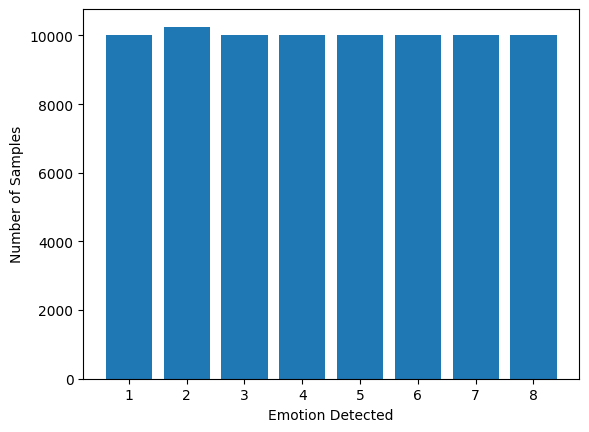

In [32]:
# 3c. Plot to see if there is an imbalance ?
plotimbalance(x_over_p, "Emotion Detected")

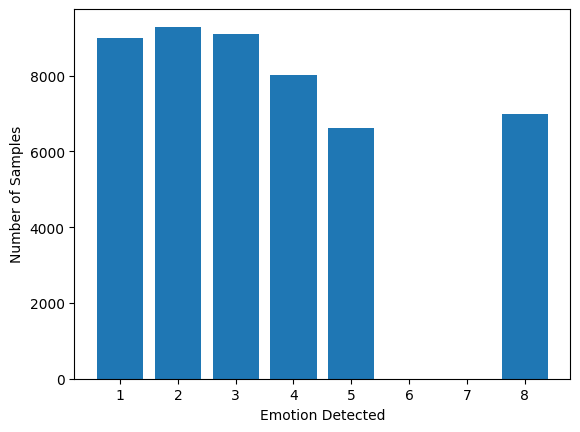

In [33]:
# 3c. Plot to see if there is an imbalance after undersampling happy
plotimbalance(x_under_without_p, "Emotion Detected")

## Models

### Support Vector Machine

In [21]:
"""
Fine Tune the Support Vector Machine by finding the best attributes:
 - Kernal: Linear and RBF
 - RBF Kernal: C and Gamma
 - Linear Kernal: C , dual  "Auto"
"""

# Set Kernals
svm_model_rbf = svm.SVC(kernel="rbf")
svm_model_linear = svm.SVC()

# Find the best value for gamma and c
c_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 1000]
gamma_range = [0.1, 1, 10, 100]

param_grid = dict(gamma=gamma_range, C=c_range)

#Create the GridSearchCV object
grid_clf = GridSearchCV(svm.SVC(kernel="rbf"), param_grid)

#Fit the data with the best possible parameters
grid_clf = grid_clf.fit(x_over_i, y_over_i)

#Print the best estimator with it's parameters
print(grid_clf.best_params_)

In [75]:
svm_rbf = svm.SVC(kernel="rbf",
                  C = 10,
                  gamma = 0.1)

In [76]:
# SVM Model for datasets without emotions: contempt and disgust
svm_rbf_p = svm_rbf.fit(x_under_without_p, y_under_without_p)
svm_y_p = svm_rbf_p.predict(x_test_without_p)

svm_rbf_i = svm_rbf.fit(x_under_without_i, y_under_without_i)
svm_y_i = svm_rbf_i.predict(x_test_without_i)

svm_rbf_l = svm_rbf.fit(x_under_without_l, y_under_without_l)
svm_y_l = svm_rbf_l.predict(x_test_without_l)

In [ ]:
# SVM Model for datasets with emotions: contempt and disgust
svm_rbf_p_with = svm_rbf.fit(x_over_p, y_over_p)
svm_y_p_with = svm_rbf_p_with.predict(x_test_p)

svm_rbf_i_with = svm_rbf.fit(x_over_i, y_over_i)
svm_y_i_with = svm_rbf_i_with.predict(x_test_i)

svm_rbf_l_with = svm_rbf.fit(x_over_l, y_over_l)
svm_y_l_with = svm_rbf_l_with.predict(x_test_l)

In [ ]:
svm_linear = LinearSVC(C = 10)

In [ ]:
# SVM Model for datasets without emotions: contempt and disgust
svm_linear_p = svm_linear.fit(x_under_without_p, y_under_without_p)
svm_linear_y_p = svm_linear_p.predict(x_test_without_p)

svm_linear_i = svm_linear.fit(x_under_without_i, y_under_without_i)
svm_linear_y_i = svm_linear_i.predict(x_test_without_i)

svm_linear_l = svm_linear.fit(x_under_without_l, y_under_without_l)
svm_linear_y_l = svm_linear_l.predict(x_test_without_l)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increas

In [ ]:
# SVM Model for datasets with emotions: contempt and disgust
svm_linear_p_with = svm_linear.fit(x_over_p, y_over_p)
svm_linear_y_p_with = svm_linear_p_with.predict(x_test_p)

svm_linear_i_with = svm_linear.fit(x_over_i, y_over_i)
svm_linear_y_i_with = svm_linear_i_with.predict(x_test_i)

svm_linear_l_with = svm_linear.fit(x_over_l, y_over_l)
svm_linear_y_l_with = svm_linear_l_with.predict(x_test_l)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Naives Bayes

In [51]:
# Gaussian NB
gnd = GaussianNB()

# Complement NB
cnb = ComplementNB(alpha=1)

In [52]:
# Gaussian Model for datasets without emotions: contempt and disgust
gnd_p = gnd.fit(x_under_without_p, y_under_without_p)
gnd_p_y = gnd_p.predict(x_test_without_p)

gnd_i = gnd.fit(x_under_without_i, y_under_without_i)
gnd_i_y = gnd_i.predict(x_test_without_i)

gnd_l = gnd.fit(x_under_without_l, y_under_without_l)
gnd_l_y = gnd_l.predict(x_test_without_l)

In [53]:
# Gaussian Model for datasets with emotions: contempt and disgust
gnd_p_with = gnd.fit(x_over_p, y_over_p)
gnd_p_with_y = gnd_p_with.predict(x_test_p)

gnd_i_with = gnd.fit(x_over_i, y_over_i)
gnd_i_with_y = gnd_i_with.predict(x_test_i)

gnd_l_with = gnd.fit(x_over_l, y_over_l)
gnd_l_with_y = gnd_l_with.predict(x_test_l)

In [54]:
# Complement NB
cnb = ComplementNB(alpha=1)

In [99]:
x_under_without_l

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,Z_59,Z_60,Z_61,Z_62,Z_63,Z_64,Z_65,Z_66,Z_67,Emotion Detected
5684,-50.1,-49.2,-48.6,-47.7,-45.2,-40.9,-34.1,-26.0,-23.5,-26.8,...,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4,1
3835,-95.3,-97.5,-98.3,-96.9,-88.9,-72.6,-51.8,-31.2,-10.4,10.7,...,157.9,170.4,145.9,143.5,143.7,160.7,146.9,146.6,149.3,1
3132,-50.1,-49.2,-48.6,-47.7,-45.2,-40.9,-34.1,-26.0,-23.5,-26.8,...,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4,1
5308,-50.1,-49.2,-48.6,-47.7,-45.2,-40.9,-34.1,-26.0,-23.5,-26.8,...,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4,1
1712,-50.1,-49.2,-48.6,-47.7,-45.2,-40.9,-34.1,-26.0,-23.5,-26.8,...,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9578,-82.7,-84.8,-84.5,-82.4,-77.8,-68.1,-52.4,-31.9,-9.9,11.4,...,170.2,175.0,158.4,154.9,153.0,164.5,156.8,159.3,162.4,8
11413,-108.4,-107.6,-106.5,-102.3,-89.9,-69.6,-44.1,-18.8,2.5,23.5,...,147.8,157.3,144.4,144.9,148.3,167.8,151.1,147.8,147.1,8
12180,-78.7,-75.2,-69.7,-62.7,-53.0,-39.4,-24.7,-6.6,11.7,29.6,...,174.9,182.5,168.7,166.8,166.2,177.3,167.4,167.5,169.7,8
4934,-50.1,-49.2,-48.6,-47.7,-45.2,-40.9,-34.1,-26.0,-23.5,-26.8,...,28.6,39.0,22.9,21.5,22.7,38.0,23.1,21.8,23.4,8


In [55]:
# Complemnt Model for datasets without emotions: contempt and disgust
cnb_p = cnb.fit(x_under_without_p, y_under_without_p)
cnb_p_y = cnb_p.predict(x_test_without_p)

cnb_i = cnb.fit(x_under_without_i, y_under_without_i)
cnb_i_y = cnb_i.predict(x_test_without_i)

"""
cnb_l = cnb.fit(x_under_without_l, y_under_without_l)
cnb_l_y = cnb_l.predict(x_test_without_l)
"""

'\ncnb_l = cnb.fit(x_under_without_l, y_under_without_l)\ncnb_l_y = cnb_l.predict(x_test_without_l)\n'

In [56]:
# Complemnt Model for datasets with emotions: contempt and disgust
cnd_p_with = cnb.fit(x_over_p, y_over_p)
cnd_p_with_y = cnd_p_with.predict(x_test_p)

cnd_i_with = cnb.fit(x_over_i, y_over_i)
cnd_i_with_y = cnd_i_with.predict(x_test_i)

"""
cnd_l_with = cnb.fit(x_over_l, y_over_l)
cnd_l_with_y = cnd_l_with.predict(x_test_l)  
"""

'\ncnd_l_with = cnb.fit(x_over_l, y_over_l)\ncnd_l_with_y = cnd_l_with.predict(x_test_l)  \n'

# Random Forest

In [43]:
# Fine Tuning Attributes for Random Forest: n_estimators, max_features, min_sample_leaf

# n_estimators = [2, 4, 8, 16, 32, 64, 100]

# max_Features = [Auto, sqrt, 0.2]

# min_sample_leaf = [75, 95, 100]

rf = RandomForestClassifier()

rf_params = {"n_estimators": [2, 4, 8, 16, 32, 64, 100],
             "max_features": ["Auto", "sqrt", "0.2"],
             "min_samples_leaf": [75, 95, 100]}

rf_cv_model = GridSearchCV(rf, rf_params).fit(x_under_without_p, y_under_without_p)

print(rf_cv_model.best_params_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 315.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3

{'max_features': 'sqrt', 'min_samples_leaf': 75, 'n_estimators': 100}


In [44]:
# Random Forest Model with the best parameters
rf = RandomForestClassifier(max_features= 'sqrt', 
                            min_samples_leaf= 75,
                            n_estimators= 100)

In [45]:
# Random Forest Model for datasets without emotions: contempt and disgust
rf_without_i = rf.fit(x_under_without_i, y_under_without_i)
rf_without_i_y = rf_without_i.predict(x_test_without_i)

rf_without_p = rf.fit(x_under_without_p, y_under_without_p)
rf_without_p_y = rf_without_p.predict(x_test_without_p)

rf_without_l = rf.fit(x_under_without_l, y_under_without_l)
rf_without_l_y = rf_without_l.predict(x_test_without_l)

In [46]:
# Random Forest Model for datasets with emotions
rf_i = rf.fit(x_over_i, y_over_i)
rf_i_y = rf_i.predict(x_test_i)

rf_p = rf.fit(x_over_p, y_over_p)
rf_p_y = rf_p.predict(x_test_p)

rf_l = rf.fit(x_over_l, y_over_l)
rf_l_y = rf_l.predict(x_test_l)

# Decision Tree

In [60]:
# Decision Tree Model
tree = DecisionTreeClassifier(splitter="best",
                              max_depth=None,
                              min_samples_split=2,
                              min_samples_leaf=1)

In [61]:
# Decision Tree Model for datasets without emotions: contempt and disgust
tree_without_i = tree.fit(x_under_without_i, y_under_without_i)
tree_without_i_y = tree_without_i.predict(x_test_without_i)

tree_without_p = tree.fit(x_under_without_p, y_under_without_p)
tree_without_p_y = tree_without_p.predict(x_test_without_p)

tree_without_l = tree.fit(x_under_without_l, y_under_without_l)
tree_without_l_y = tree_without_l.predict(x_test_without_l)


In [62]:
# Decision Tree Model for datasets with emotions
tree_i = tree.fit(x_over_i, y_over_i)
tree_i_y = tree_i.predict(x_test_i)

tree_p = tree.fit(x_over_p, y_over_p)
tree_p_y = tree_p.predict(x_test_p)

tree_l = tree.fit(x_over_l, y_over_l)
tree_l_y = tree_l.predict(x_test_l)

# Reports

In [66]:
# Metircs on how well the models performed

def metics_reports(y_label_training, y_label_prediction):
    
    # Accuracy Score Prediciton 
    print("Accurary Score")
    print(accuracy_score(y_label_training, y_label_prediction))
    
    # Confusion Matrix Prediciton 
    print("Confusin Matrix Score")
    cm = confusion_matrix(y_label_training, y_label_prediction)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    #F1 Score
    print(f1_score(y_label_training, y_label_prediction, average='macro'))
    
    # Classification Report
    print(classification_report(y_label_training, y_label_prediction))

In [ ]:
# SVM Model for datasets without emotions: contempt and disgust
print("Supprot Vector")

print("Without Emotion Presences")
metics_reports(y_test_without_p, svm_y_p)

print("Without Emotion Intensity")
metics_reports(y_test_without_i, svm_y_i)

print("Without Emotion Landmarks")
metics_reports(y_test_without_l, svm_y_l)

With Emotions Presences
Accurary Score
1.0
Confusin Matrix Score


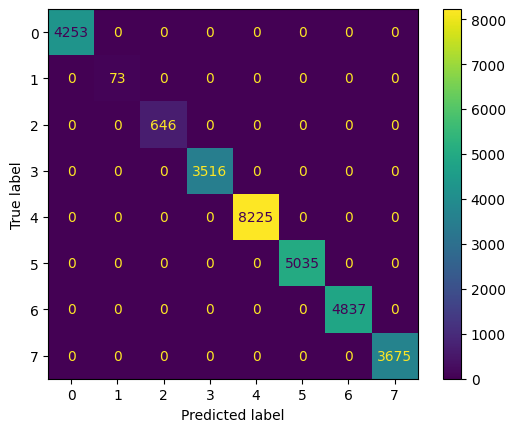

With Emotions Intensity
Accurary Score
0.9999008592200925
Confusin Matrix Score


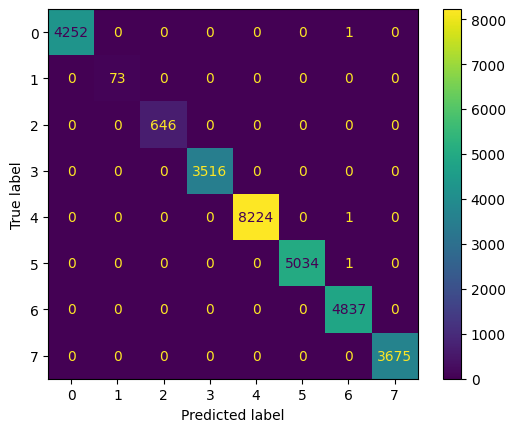

With Emotions Landmarks
Accurary Score
0.6314276272306676
Confusin Matrix Score


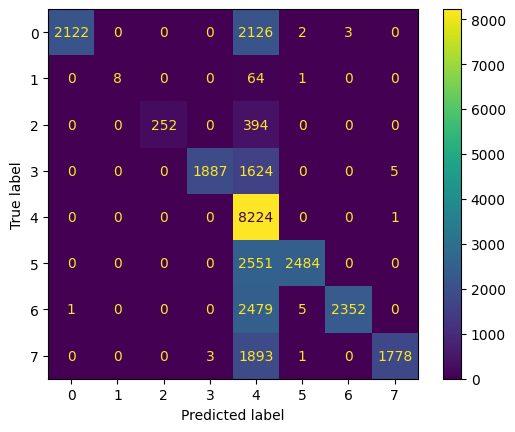

In [ ]:
# SVM Model for datasets with emotions: contempt and disgust
print("With Emotions Presences")
metics_reports(y_test_p, svm_y_p_with)

print("With Emotions Intensity")
metics_reports(y_test_i, svm_y_i_with)

print("With Emotions Landmarks")
metics_reports(y_test_l, svm_y_l_with)


Accurary Score
0.8186862292395919
Confusin Matrix Score


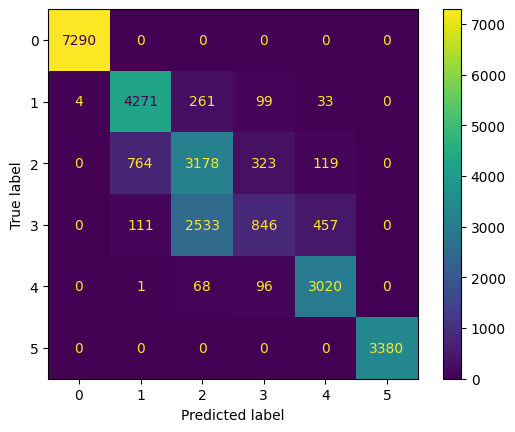

Accurary Score
0.3947642809264914
Confusin Matrix Score


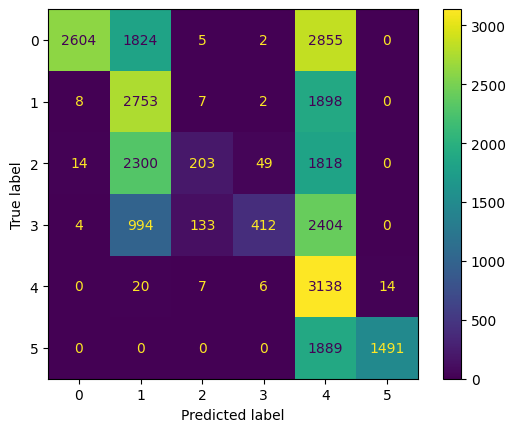

Accurary Score
0.48931257913160053
Confusin Matrix Score


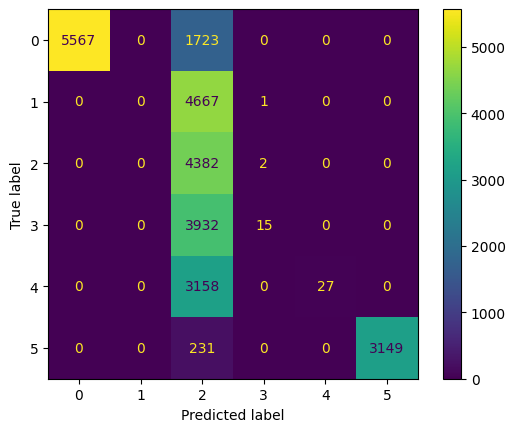

In [ ]:
# SVM Linear Model for datasets without emotions: contempt and disgust

metics_reports(y_test_without_p, svm_linear_y_p)

metics_reports(y_test_without_i, svm_linear_y_i)

metics_reports(y_test_without_l, svm_linear_y_l)

Accurary Score
0.6948446794448117
Confusin Matrix Score


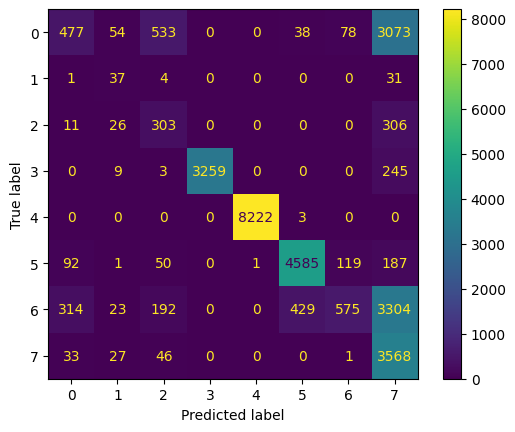

Accurary Score
0.7840713813615334
Confusin Matrix Score


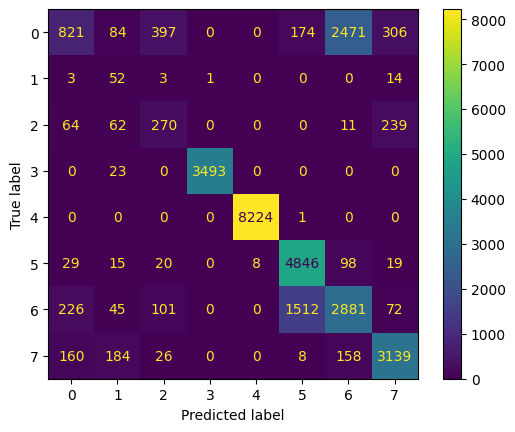

Accurary Score
0.5562128222075347
Confusin Matrix Score


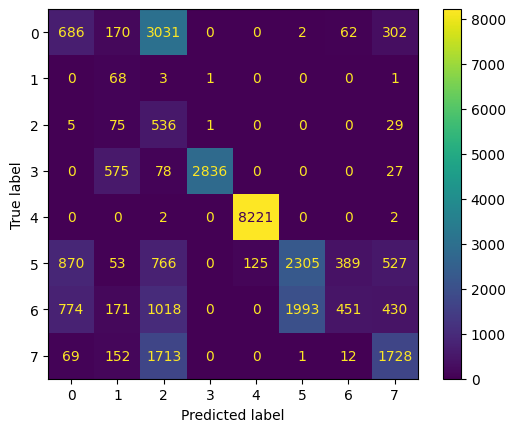

In [ ]:
# SVM Linear Model for datasets with emotions: contempt and disgust
metics_reports(y_test_p, svm_linear_y_p_with)

metics_reports(y_test_i, svm_linear_y_i_with)

metics_reports(y_test_l, svm_linear_y_l_with)

Without Emotion Presences
Accurary Score
1.0
Confusin Matrix Score


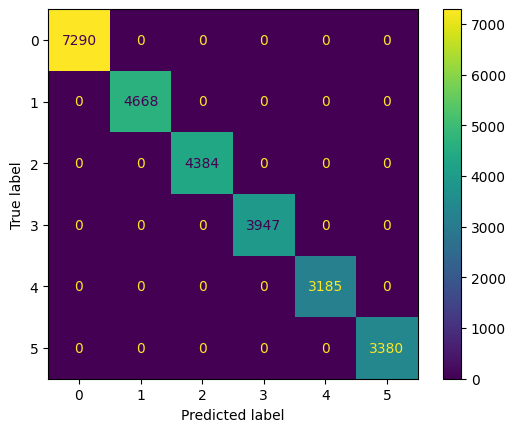

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7290
           2       1.00      1.00      1.00      4668
           3       1.00      1.00      1.00      4384
           4       1.00      1.00      1.00      3947
           5       1.00      1.00      1.00      3185
           8       1.00      1.00      1.00      3380

    accuracy                           1.00     26854
   macro avg       1.00      1.00      1.00     26854
weighted avg       1.00      1.00      1.00     26854

Without Emotion Intensity
Accurary Score
1.0
Confusin Matrix Score


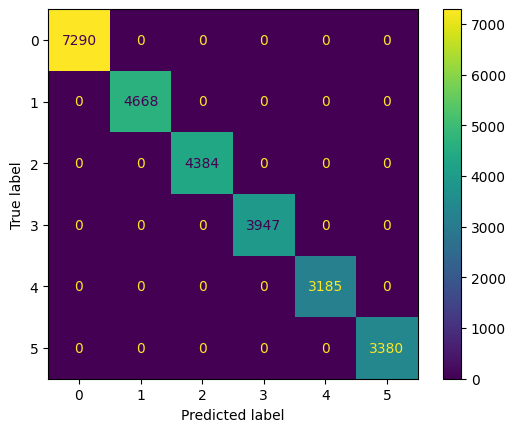

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7290
           2       1.00      1.00      1.00      4668
           3       1.00      1.00      1.00      4384
           4       1.00      1.00      1.00      3947
           5       1.00      1.00      1.00      3185
           8       1.00      1.00      1.00      3380

    accuracy                           1.00     26854
   macro avg       1.00      1.00      1.00     26854
weighted avg       1.00      1.00      1.00     26854

Without Emotion Landmarks


In [68]:
# Naives Bayes: Gauassin for the dataset without emotions
print("Without Emotion Presences")
metics_reports(y_test_without_p, gnd_p_y)

print("Without Emotion Intensity")
metics_reports(y_test_without_i, gnd_i_y)

#print("Without Emotion Landmarks")
#metics_reports(y_test_without_l, svm_y_l)

With Emotions Presences
Accurary Score
1.0
Confusin Matrix Score


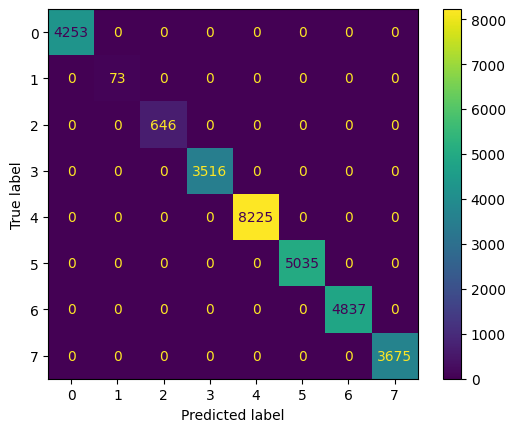

1.0
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00      4253
    Contempt       1.00      1.00      1.00        73
     Disgust       1.00      1.00      1.00       646
        Fear       1.00      1.00      1.00      3516
       Happy       1.00      1.00      1.00      8225
     Neutral       1.00      1.00      1.00      5035
         Sad       1.00      1.00      1.00      4837
    Surprise       1.00      1.00      1.00      3675

    accuracy                           1.00     30260
   macro avg       1.00      1.00      1.00     30260
weighted avg       1.00      1.00      1.00     30260

With Emotions Intensity
Accurary Score
1.0
Confusin Matrix Score


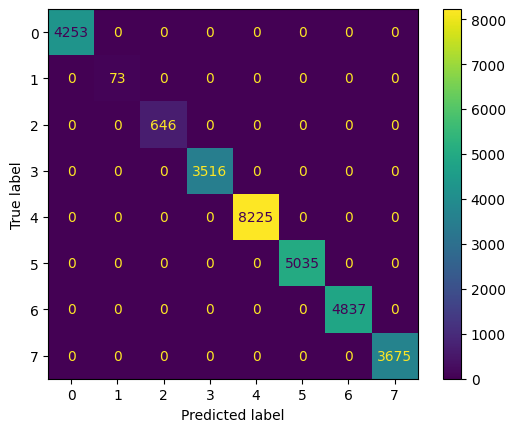

1.0
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00      4253
    Contempt       1.00      1.00      1.00        73
     Disgust       1.00      1.00      1.00       646
        Fear       1.00      1.00      1.00      3516
       Happy       1.00      1.00      1.00      8225
     Neutral       1.00      1.00      1.00      5035
         Sad       1.00      1.00      1.00      4837
    Surprise       1.00      1.00      1.00      3675

    accuracy                           1.00     30260
   macro avg       1.00      1.00      1.00     30260
weighted avg       1.00      1.00      1.00     30260

With Emotions Landmarks


In [69]:
# Naives Bayes: Guassin for the dataset with emotions
print("With Emotions Presences")
metics_reports(y_test_p, gnd_p_with_y)

print("With Emotions Intensity")
metics_reports(y_test_i, gnd_i_with_y)

#print("With Emotions Landmarks")
#metics_reports(y_test_l, svm_y_l_with)

Naives Bayes
Without Emotion Presences
Accurary Score
0.33049080211514115
Confusin Matrix Score


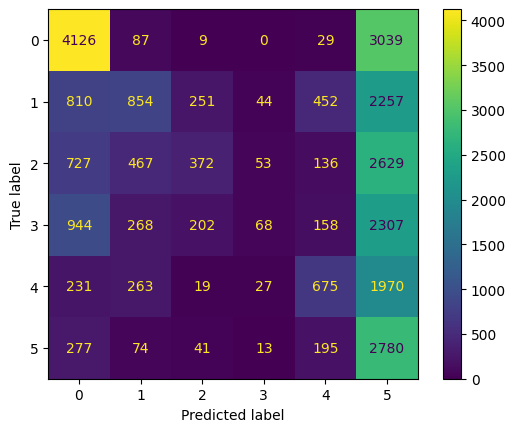

0.2640878580187748
              precision    recall  f1-score   support

           1       0.58      0.57      0.57      7290
           2       0.42      0.18      0.26      4668
           3       0.42      0.08      0.14      4384
           4       0.33      0.02      0.03      3947
           5       0.41      0.21      0.28      3185
           8       0.19      0.82      0.30      3380

    accuracy                           0.33     26854
   macro avg       0.39      0.31      0.26     26854
weighted avg       0.42      0.33      0.30     26854

Without Emotion Intensity
Accurary Score
0.33756609816042304
Confusin Matrix Score


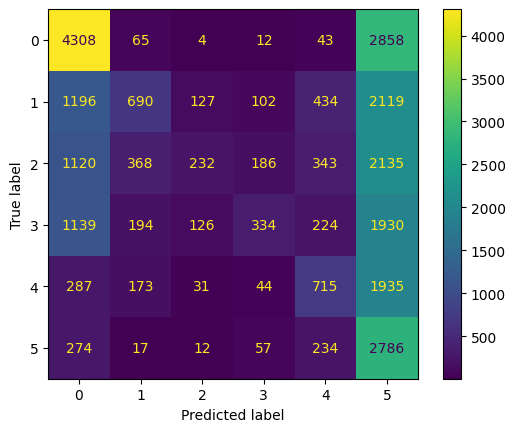

0.2689255062029873
              precision    recall  f1-score   support

           1       0.52      0.59      0.55      7290
           2       0.46      0.15      0.22      4668
           3       0.44      0.05      0.09      4384
           4       0.45      0.08      0.14      3947
           5       0.36      0.22      0.28      3185
           8       0.20      0.82      0.33      3380

    accuracy                           0.34     26854
   macro avg       0.40      0.32      0.27     26854
weighted avg       0.43      0.34      0.30     26854

Without Emotion Landmarks


In [70]:
# Naives Bayes: Con. for the dataset without emotions
print("Naives Bayes")

print("Without Emotion Presences")
metics_reports(y_test_without_p, cnb_p_y)

print("Without Emotion Intensity")
metics_reports(y_test_without_i, cnb_i_y)

#print("Without Emotion Landmarks")
#metics_reports(y_test_without_l, svm_y_l)

With Emotions Presences
Accurary Score
0.29950429610046264
Confusin Matrix Score


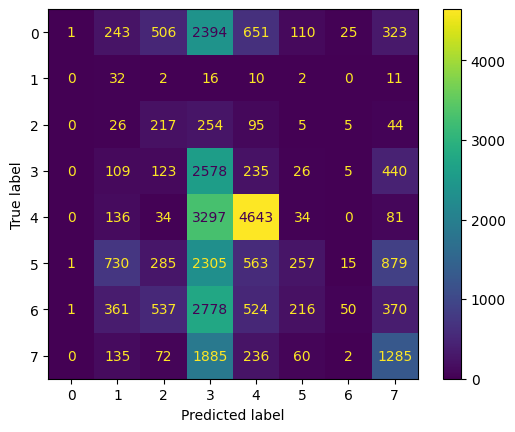

With Emotions Intensity
Accurary Score
0.2979841374752148
Confusin Matrix Score


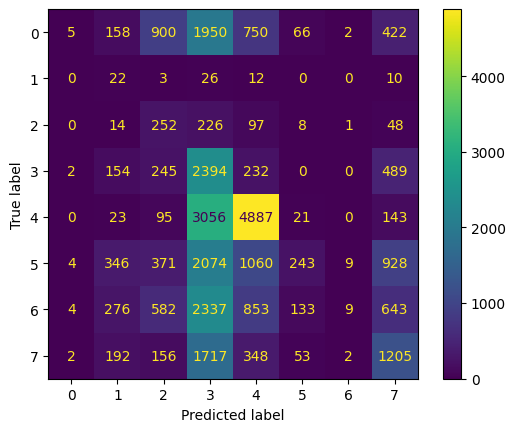

With Emotions Landmarks


In [59]:
# Naives Bayes: Con. for the dataset with emotions
print("With Emotions Presences")
metics_reports(y_test_p, cnd_p_with_y)

print("With Emotions Intensity")
metics_reports(y_test_i, cnd_i_with_y)

#print("With Emotions Landmarks")
#metics_reports(y_test_l, svm_y_l_with)

Random Forest
Without Emotions Intensity
Accurary Score
0.9900945855366053
Confusin Matrix Score


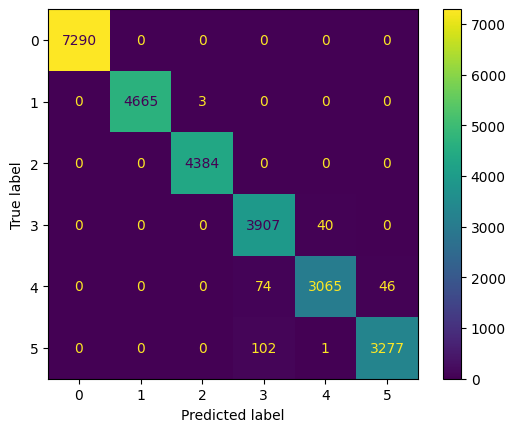

0.9874360711583942
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7290
           2       1.00      1.00      1.00      4668
           3       1.00      1.00      1.00      4384
           4       0.96      0.99      0.97      3947
           5       0.99      0.96      0.97      3185
           8       0.99      0.97      0.98      3380

    accuracy                           0.99     26854
   macro avg       0.99      0.99      0.99     26854
weighted avg       0.99      0.99      0.99     26854

Without Emotions Presences
Accurary Score
0.9860355999106278
Confusin Matrix Score


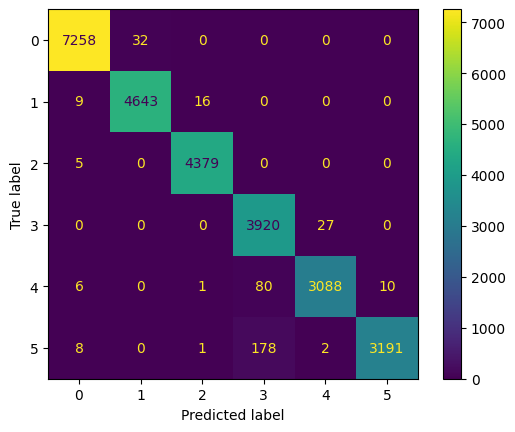

0.9836423978491537
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7290
           2       0.99      0.99      0.99      4668
           3       1.00      1.00      1.00      4384
           4       0.94      0.99      0.96      3947
           5       0.99      0.97      0.98      3185
           8       1.00      0.94      0.97      3380

    accuracy                           0.99     26854
   macro avg       0.99      0.98      0.98     26854
weighted avg       0.99      0.99      0.99     26854

Without Emotions Landmarks
Accurary Score
0.7568704848439711
Confusin Matrix Score


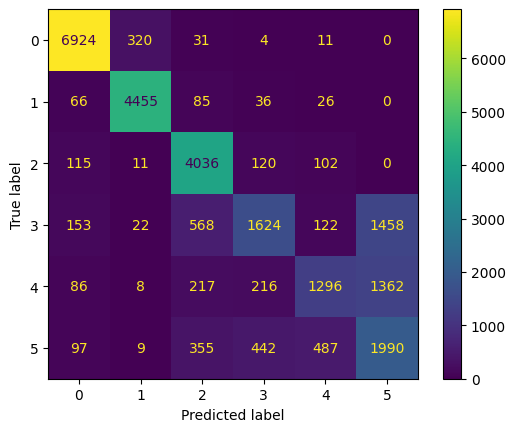

0.7004838424485701
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      7290
           2       0.92      0.95      0.94      4668
           3       0.76      0.92      0.83      4384
           4       0.67      0.41      0.51      3947
           5       0.63      0.41      0.50      3185
           8       0.41      0.59      0.49      3380

    accuracy                           0.76     26854
   macro avg       0.72      0.71      0.70     26854
weighted avg       0.76      0.76      0.75     26854



In [71]:
# Random Forest without Emotions

print("Random Forest")

print("Without Emotions Intensity")
metics_reports(y_test_without_i, rf_without_i_y)

print("Without Emotions Presences")
metics_reports(y_test_without_p, rf_without_p_y)

print("Without Emotions Landmarks")
metics_reports(y_test_without_l, rf_without_l_y)


With Emotions Intensity
Accurary Score
0.9868473231989425
Confusin Matrix Score


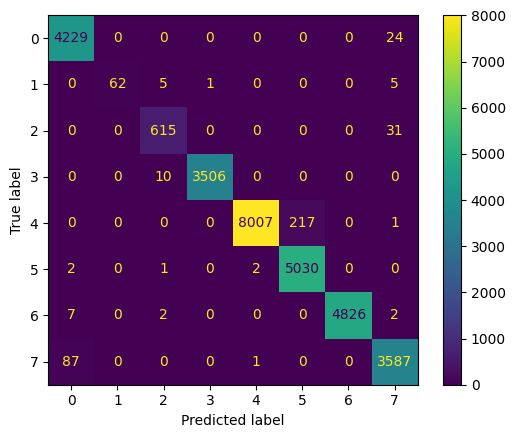

0.9759619234912772
              precision    recall  f1-score   support

       Anger       0.98      0.99      0.99      4253
    Contempt       1.00      0.85      0.92        73
     Disgust       0.97      0.95      0.96       646
        Fear       1.00      1.00      1.00      3516
       Happy       1.00      0.97      0.99      8225
     Neutral       0.96      1.00      0.98      5035
         Sad       1.00      1.00      1.00      4837
    Surprise       0.98      0.98      0.98      3675

    accuracy                           0.99     30260
   macro avg       0.99      0.97      0.98     30260
weighted avg       0.99      0.99      0.99     30260

With Emotions Presences
Accurary Score
0.9852941176470589
Confusin Matrix Score


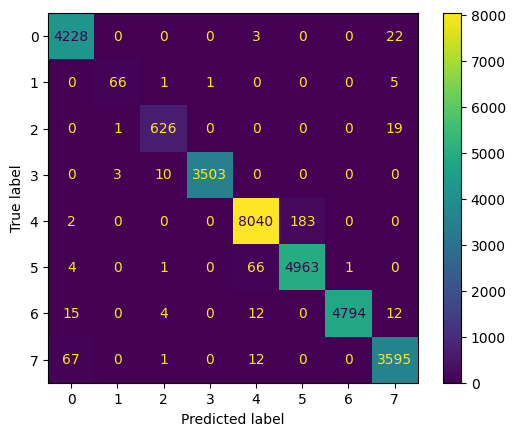

0.9767187183962943
              precision    recall  f1-score   support

       Anger       0.98      0.99      0.99      4253
    Contempt       0.94      0.90      0.92        73
     Disgust       0.97      0.97      0.97       646
        Fear       1.00      1.00      1.00      3516
       Happy       0.99      0.98      0.98      8225
     Neutral       0.96      0.99      0.97      5035
         Sad       1.00      0.99      1.00      4837
    Surprise       0.98      0.98      0.98      3675

    accuracy                           0.99     30260
   macro avg       0.98      0.97      0.98     30260
weighted avg       0.99      0.99      0.99     30260

With Emotions Landmarks
Accurary Score
0.856708526107072
Confusin Matrix Score


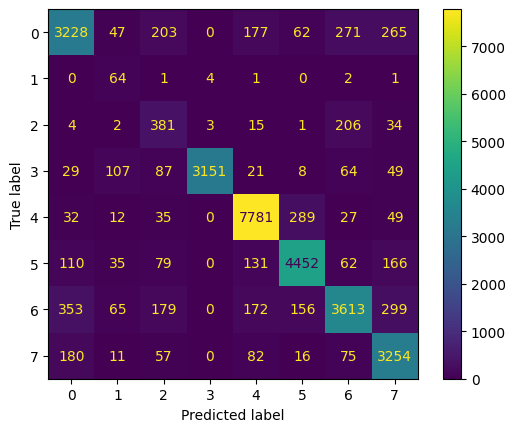

0.743425065610105
              precision    recall  f1-score   support

       Anger       0.82      0.76      0.79      4253
    Contempt       0.19      0.88      0.31        73
     Disgust       0.37      0.59      0.46       646
        Fear       1.00      0.90      0.94      3516
       Happy       0.93      0.95      0.94      8225
     Neutral       0.89      0.88      0.89      5035
         Sad       0.84      0.75      0.79      4837
    Surprise       0.79      0.89      0.84      3675

    accuracy                           0.86     30260
   macro avg       0.73      0.82      0.74     30260
weighted avg       0.87      0.86      0.86     30260



In [72]:
# Random Forest with Emotions

print("With Emotions Intensity")
metics_reports(y_test_i, rf_i_y)

print("With Emotions Presences")
metics_reports(y_test_p, rf_p_y)

print("With Emotions Landmarks")
metics_reports(y_test_l, rf_l_y)

Decision Tree
Without Emotions Intensity
Accurary Score
1.0
Confusin Matrix Score


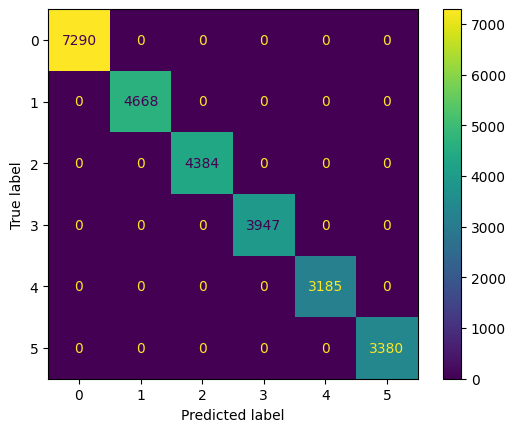

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7290
           2       1.00      1.00      1.00      4668
           3       1.00      1.00      1.00      4384
           4       1.00      1.00      1.00      3947
           5       1.00      1.00      1.00      3185
           8       1.00      1.00      1.00      3380

    accuracy                           1.00     26854
   macro avg       1.00      1.00      1.00     26854
weighted avg       1.00      1.00      1.00     26854

Without Emotions Presences
Accurary Score
1.0
Confusin Matrix Score


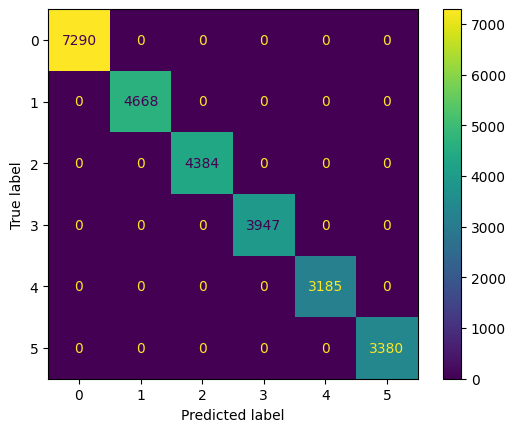

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7290
           2       1.00      1.00      1.00      4668
           3       1.00      1.00      1.00      4384
           4       1.00      1.00      1.00      3947
           5       1.00      1.00      1.00      3185
           8       1.00      1.00      1.00      3380

    accuracy                           1.00     26854
   macro avg       1.00      1.00      1.00     26854
weighted avg       1.00      1.00      1.00     26854

Without Emotions Landmarks
Accurary Score
1.0
Confusin Matrix Score


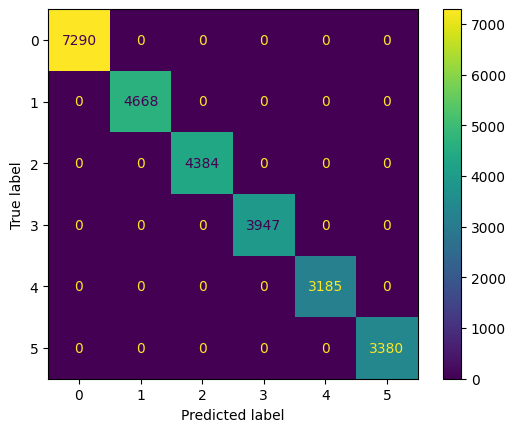

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7290
           2       1.00      1.00      1.00      4668
           3       1.00      1.00      1.00      4384
           4       1.00      1.00      1.00      3947
           5       1.00      1.00      1.00      3185
           8       1.00      1.00      1.00      3380

    accuracy                           1.00     26854
   macro avg       1.00      1.00      1.00     26854
weighted avg       1.00      1.00      1.00     26854



In [73]:
# Decision Tree without Emotions

print("Decision Tree")

print("Without Emotions Intensity")
metics_reports(y_test_without_i, tree_without_i_y)

print("Without Emotions Presences")
metics_reports(y_test_without_p, tree_without_p_y)

print("Without Emotions Landmarks")
metics_reports(y_test_without_l, tree_without_l_y)

With Emotions Intensity
Accurary Score
1.0
Confusin Matrix Score


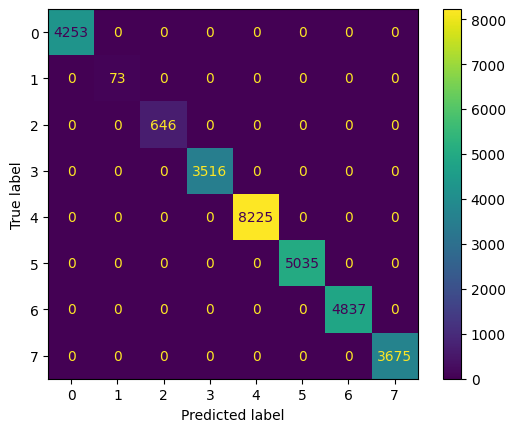

1.0
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00      4253
    Contempt       1.00      1.00      1.00        73
     Disgust       1.00      1.00      1.00       646
        Fear       1.00      1.00      1.00      3516
       Happy       1.00      1.00      1.00      8225
     Neutral       1.00      1.00      1.00      5035
         Sad       1.00      1.00      1.00      4837
    Surprise       1.00      1.00      1.00      3675

    accuracy                           1.00     30260
   macro avg       1.00      1.00      1.00     30260
weighted avg       1.00      1.00      1.00     30260

With Emotions Presences
Accurary Score
1.0
Confusin Matrix Score


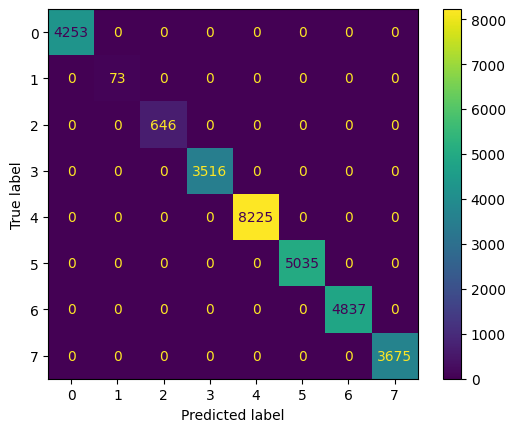

1.0
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00      4253
    Contempt       1.00      1.00      1.00        73
     Disgust       1.00      1.00      1.00       646
        Fear       1.00      1.00      1.00      3516
       Happy       1.00      1.00      1.00      8225
     Neutral       1.00      1.00      1.00      5035
         Sad       1.00      1.00      1.00      4837
    Surprise       1.00      1.00      1.00      3675

    accuracy                           1.00     30260
   macro avg       1.00      1.00      1.00     30260
weighted avg       1.00      1.00      1.00     30260

With Emotions Landmarks
Accurary Score
1.0
Confusin Matrix Score


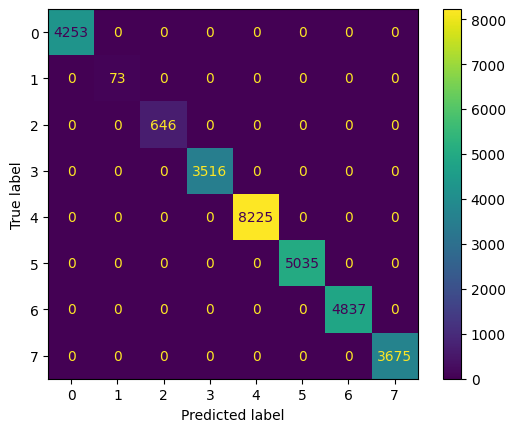

1.0
              precision    recall  f1-score   support

       Anger       1.00      1.00      1.00      4253
    Contempt       1.00      1.00      1.00        73
     Disgust       1.00      1.00      1.00       646
        Fear       1.00      1.00      1.00      3516
       Happy       1.00      1.00      1.00      8225
     Neutral       1.00      1.00      1.00      5035
         Sad       1.00      1.00      1.00      4837
    Surprise       1.00      1.00      1.00      3675

    accuracy                           1.00     30260
   macro avg       1.00      1.00      1.00     30260
weighted avg       1.00      1.00      1.00     30260



In [74]:
# Decision Tree with Emotions

print("With Emotions Intensity")
metics_reports(y_test_i, tree_i_y)

print("With Emotions Presences")
metics_reports(y_test_p, tree_p_y)

print("With Emotions Landmarks")
metics_reports(y_test_l, tree_l_y)